# What is text processing

Text processing involves automating tasks related to working with electronic text, making it easier to handle large volumes of unstructured data. This includes activities such as content creation, modification, formatting, and extracting insights from textual data. Text processing heavily relies on Natural Language Processing (NLP), a subfield of artificial intelligence that enables machines to understand and work with human language. Additionally, text processing tools leverage machine learning techniques to automatically extract valuable information from text data.

Key tasks in text processing include text classification, which involves assigning labels or categories to text documents, such as spam detection or sentiment analysis. Information extraction identifies relevant entities, like names, dates, and locations, from unstructured text. Text summarization condenses lengthy text into concise summaries, while named entity recognition (NER) identifies and classifies named entities like people and organizations. Other tasks include language translation, converting text from one language to another, and sentiment analysis, determining the emotional tone of text. Text generation creates new text based on patterns learned from existing data.

Text processing has various real-world applications. Chatbots use NLP to understand user queries and provide relevant responses. Search engines like Google improve search results using NLP. In healthcare, text processing interprets electronic health records or summarizes medical reports. In retail, customer service chatbots assist users, and advanced models like GPT-3 can generate coherent essays and articles.

However, text processing faces challenges, such as bias, where NLP systems can inherit biases present in training data. Ensuring generated text is coherent and contextually relevant, as well as mitigating erratic behavior in some NLP models, are also significant challenges.

In summary, text processing empowers us to extract meaning, automate tasks, and communicate effectively in the digital age. Whether in chatbots, search engines, or medical records, NLP plays a crucial role in our daily lives.

# Why is this dataset appropriate for text processing

The **emails.csv** dataset from Kaggle for text processing, was used for several reasons:

1. **Dataset Overview**:
   - This dataset contains examples of emails, each labeled as either **spam** or **ham** (non-spam), mimicking the layout of a typical email inbox.
   - It includes over **5,000 examples**, providing a substantial amount of data for training and testing models.
   - The labels are crucial for training a model to recognize and categorize emails accurately.

2. **Reasons for Appropriateness**:

    **Pre-Classified Labels**:
     - The dataset provides **pre-classified labels** for each email, indicating whether it is spam or ham.
     - These labels are essential for supervised machine learning, where models are trained using labeled data.
     - Having ground truth labels allows for effective evaluation of the model's performance.

    **Real-World Relevance**:
     - Email spam detection is a **real-world problem** faced by email providers, businesses, and individuals.
     - Using this dataset simulates the actual task of filtering spam emails from an inbox, making the project highly relevant.

    **Diverse Text Content**:
     - The dataset includes a variety of email content, such as promotional emails, newsletters, and potentially malicious spam.
     - This diversity ensures that the model learns from a wide range of text patterns, enhancing its robustness.

    **Challenges and Variability**:
     - Emails exhibit different writing styles, lengths, and structures, with some spam emails being well-disguised.
     - Handling this variability prepares the model for real-world scenarios, improving its ability to differentiate between spam and legitimate emails.

    **Machine Learning Training**:
     - The dataset can be used to train machine learning models (e.g., Naive Bayes, logistic regression, SVM) to identify patterns associated with spam and non-spam emails.
     - Features such as word frequencies, the presence of specific keywords, and structural cues can be extracted from the email text.

    **Evaluation and Generalization**:
     - The dataset can be split into training and testing subsets to assess the model's performance.
     - Training on a portion of the data and evaluating on the rest helps in assessing the model's ability to generalize to unseen emails, which is crucial for effective spam detection.

3. **Next Steps**:
   - Preprocess the email text (e.g., tokenization, removing stop words, stemming) to prepare it for machine learning algorithms.
   - Experiment with different models and feature representations (e.g., bag-of-words, TF-IDF) to determine the best approach.
   - Evaluate the model's accuracy, precision, recall, and F1-score to ensure effective spam detection.


# Analysis of the emails.csv Dataset for Spam Detection
Problem Statement:

Our objective is to classify emails as either spam (unsolicited bulk emails) or ham (legitimate non-spam emails).
By creating an effective spam filter, we aim to enhance email security and maintain clutter-free inboxes.
Dataset Overview:

The emails.csv dataset comprises over 5,000 email examples, each labeled as spam or ham.
This labeled data will be used for supervised machine learning.
Data Cleaning:

Load the dataset from the CSV file.
Clean the data by:
Dropping unnecessary columns.
Encoding the target variable (spam or ham).
Handling any missing values and duplicate entries.
Exploratory Data Analysis (EDA):

Conduct EDA to understand the dataset:
Visualize the distribution of spam vs. ham emails.
Analyze characteristics of email text, such as character count, word count, and sentence count.
Identify patterns that may assist in model training.
Feature Extraction:

Convert email text into numerical features that machine learning models can process.
Techniques include:
TF-IDF (Term Frequency-Inverse Document Frequency): Captures the importance of words.
Bag-of-Words (BoW): Represents text as a vector of word frequencies.
Model Building:

Train machine learning models (e.g., logistic regression, Naive Bayes) using the extracted features.
These models will learn to distinguish spam from non-spam emails based on labeled data.
Model Evaluation:

Split the dataset into training and testing subsets.
Evaluate the model's performance using metrics such as accuracy, precision, recall, and F1-score.
Ensure the model generalizes well to unseen emails.
Model Improvement:

Iteratively enhance the model by:
Experimenting with different algorithms.
Tuning hyperparameters.
Addressing overfitting or underfitting issues.
Deployment and Use:

Deploy the model as an email filter once satisfied with its performance.
Users will benefit from accurate spam detection, improving their email experience.

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import string
import nltk

from sklearn import linear_model, decomposition
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler(with_mean =False)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,recall_score,f1_score,precision_score

In [90]:
df = pd.read_csv('emails.csv')

In [91]:
df.head(5)

,text,spam,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109
0,Subject: naturally irresistible your corporate...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Subject: the stock trading gunslinger fanny i...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Subject: unbelievable new homes made easy im ...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Subject: 4 color printing special request add...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Subject: do not have money , get software cds ...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


lots of unneccessary columns

In [92]:
df=df.iloc[:,:2]

only using the columns needed

In [93]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5725,Subject: re : research and development charges...,0
5726,"Subject: re : receipts from visit jim , than...",0
5727,Subject: re : enron case study update wow ! a...,0
5728,"Subject: re : interest david , please , call...",0


Data has 5730 rows with 2 columns, column for subject, and column saying whether or not it is spam

In [94]:
df.isnull().sum()

text    0
spam    2
dtype: int64

contains 2 null values

In [95]:
df.dropna(inplace=True)

removing null values from data

In [96]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [97]:
df.drop_duplicates(inplace=True)

removing duplicate emails

In [98]:
df.shape

(5695, 2)

In [99]:
# Define a function to extract numeric values from the 'spam' column
def extract_numeric_value(value):
    try:
        # Attempt to convert the value to an integer
        return int(value)
    except ValueError:
      # If conversion fails (e.g., value is not a number), return None
        return None

#Apply the function to the 'spam' column to ensure all values are numeric
df['spam'] = df['spam'].apply(extract_numeric_value)

#Remove the rows with invalid or missing values
df=df.drop(df[df['spam'].isnull()].index)

#Convert the 'spam' column to integer type
df['spam'] = df['spam'].astype(int)

df['spam'].value_counts()

spam
0    4326
1    1367
Name: count, dtype: int64

There are 4326 non spam emails vs 1367 spam, thus data is not well balanced, SMOTE?

Text(0.5, 1.0, 'Distribution of Spam and Non-Spam Emails')

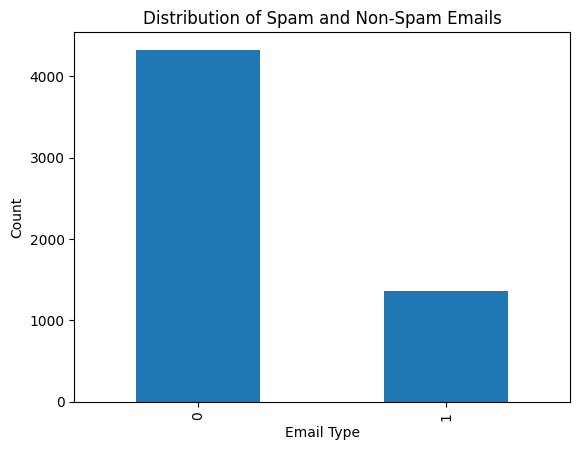

In [100]:
df['spam'].value_counts().plot(kind='bar')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Spam and Non-Spam Emails')

In [101]:
X = df['text']

In [102]:
y = df['spam']

defining my x,y 

Data Cleaning:

Punctuation is removed.
Text is converted to lowercase.
Tokenization and Stopwords Removal:

Text is split into tokens (words).
Stopwords are removed from the tokens.
Recombining Tokens:

Tokens are joined back into a string without stopwords.
The output will be a cleaned, tokenized version of the input text, ready for further processing such as feature extraction and model training.

In [103]:
def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [104]:
# Apply remove punctuation
X_punctuation_free = X.apply(lambda x: remove_punctuation(x))
X_punctuation_free.head(5)

0    Subject naturally irresistible your corporate ...
1    Subject the stock trading gunslinger  fanny is...
2    Subject unbelievable new homes made easy  im w...
3    Subject 4 color printing special  request addi...
4    Subject do not have money  get software cds fr...
Name: text, dtype: object

In [105]:
# Convert to lower case
X_lowered = X_punctuation_free.apply(lambda x: x.lower())
X_lowered.head(5)


0    subject naturally irresistible your corporate ...
1    subject the stock trading gunslinger  fanny is...
2    subject unbelievable new homes made easy  im w...
3    subject 4 color printing special  request addi...
4    subject do not have money  get software cds fr...
Name: text, dtype: object

In [106]:
# Define a function to tokenize text
def tokenize(text):
    for x in text:
        output = text.split()
    return output

In [107]:
tokens = X_lowered.apply(lambda x: tokenize(x))

In [108]:
tokens.head()

0    [subject, naturally, irresistible, your, corpo...
1    [subject, the, stock, trading, gunslinger, fan...
2    [subject, unbelievable, new, homes, made, easy...
3    [subject, 4, color, printing, special, request...
4    [subject, do, not, have, money, get, software,...
Name: text, dtype: object

In [109]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arend\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arend\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arend\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [110]:
stopwords = nltk.corpus.stopwords.words('english')

In [111]:
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [112]:
X_no_stopwords = tokens.apply(lambda x: remove_stopwords(x))

In [113]:
X_no_stopwords

0       [subject, naturally, irresistible, corporate, ...
1       [subject, stock, trading, gunslinger, fanny, m...
2       [subject, unbelievable, new, homes, made, easy...
3       [subject, 4, color, printing, special, request...
4       [subject, money, get, software, cds, software,...
                              ...                        
5725    [subject, research, development, charges, gpg,...
5726    [subject, receipts, visit, jim, thanks, invita...
5727    [subject, enron, case, study, update, wow, day...
5728    [subject, interest, david, please, call, shirl...
5729    [subject, news, aurora, 5, 2, update, aurora, ...
Name: text, Length: 5693, dtype: object

In [114]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

In [115]:
lemmatizer = WordNetLemmatizer()

In [116]:
# Function to lemmatize text
def lemmatize_words(text):
    lemmatized_output = [lemmatizer.lemmatize(word) for word in text]
    return lemmatized_output


In [117]:
# Apply lemmatization
X_lemmatized = X_no_stopwords.apply(lambda x: lemmatize_words(x))

In [118]:
X_lemmatized.head(5)

0    [subject, naturally, irresistible, corporate, ...
1    [subject, stock, trading, gunslinger, fanny, m...
2    [subject, unbelievable, new, home, made, easy,...
3    [subject, 4, color, printing, special, request...
4    [subject, money, get, software, cd, software, ...
Name: text, dtype: object

In [119]:
# Combine tokens back to a single string
X_final_text = X_lemmatized.map(' '.join)

In [120]:
X_final_text.head(5)

0    subject naturally irresistible corporate ident...
1    subject stock trading gunslinger fanny merrill...
2    subject unbelievable new home made easy im wan...
3    subject 4 color printing special request addit...
4    subject money get software cd software compati...
Name: text, dtype: object

In [121]:
from sklearn.model_selection import train_test_split

#Due to an imbalance dataset we will use stratify=y to preserve the same proportion of classes in both training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final_text,y,test_size=0.5,random_state=42,stratify=y)

In [122]:
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

In [123]:
# Initialize MultinomialNB classifier
nb_model_pipeline = MultinomialNB()

In [124]:
# Initialize SMOTE for oversampling
smote = SMOTE(random_state=42)

In [125]:
# Construct pipeline with TF-IDF vectorization, SMOTE, and MultinomialNB classifier
pipeline = Pipeline([
    ('tfidf_vectorizer', tfidf_vectorizer),
    ('smote', smote),
    ('MultinomialNB', nb_model_pipeline)
])

In [126]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer()),
                ('smote', SMOTE(random_state=42)),
                ('MultinomialNB', MultinomialNB())])

In [127]:
#Predict the class labels for the test data using the Multinomial Naive Bayes model
y_pred =pipeline.predict(X_test)
#Calculates the accuracy of the predicted labels compared to the true labels
accuracy = accuracy_score(y_test,y_pred)
#Calculate the precision of the predicted labels compared to the true labels
precision = precision_score(y_test,y_pred)
#Calculates the recal of the predicted labels compared to the true labels
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [128]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2163
           1       0.98      0.98      0.98       684

    accuracy                           0.99      2847
   macro avg       0.99      0.99      0.99      2847
weighted avg       0.99      0.99      0.99      2847



Im happy with model performance, all scores look great, too great for my liking. Im not used to seeing such high scores